<a href="https://colab.research.google.com/github/Dpgofast/Lambda-projects/blob/master/Storytelling_project_E&E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Total yearly export profit of each state 2008- 2018  
- How is a state effected during an election year?
- How is a state effected when a running candidate is from that state?
- What is the overall export rate during an election year?
- #TODO

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 

## Data taken from U.S census data sheets [here](https://www.census.gov/foreign-trade/statistics/state/origin_movement/index.html)

## Complied from 17 xls or text formatted sheets and cleaned of un-needed information resulting in a single workable Csv file

In [0]:
 
full= pd.read_csv('https://raw.githubusercontent.com/Dpgofast/Lambda-projects/master/fullset_project08-18%20-%20Sheet1%20-%20fullset_project08-18%20-%20Sheet1.csv')

In [37]:
full.head()

,State,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,"6,186.90","6,092.10","6,538.10","7,533.10","10,533.00","10,924.7","12,171.90","8,805.30","11,204.10","13,196.40","14,849.50","14,383.00","14,603.70","14,430.20","15,236.40","16,197.40","16,494.60"
1,Alaska,"2,058.80","2,165.10","2,549.00","2,967.10","3,145.40","3,044.9","2,892.20","2,533.60","3,291.60","4,071.70","3,473.10","3,664.00","4,108.00","3,960.10","3,533.40","3,958.70","3,913.90"
2,Arizona,"8,899.00","9,699.00","10,239.20","10,747.40","13,602.70","14,344.5","14,889.90","10,331.30","11,525.50","13,180.10","13,815.30","14,385.70","15,366.00","17,031.90","16,312.70","15,406.30","16,531.60"
3,Arkansas,"2,124.50","2,011.60","2,491.10","2,715.70","3,061.20","3,476.4","4,274.10","3,734.70","3,689.70","4,263.10","5,532.40","5,355.10","4,871.50","4,339.60","4,075.70","4,585.90","5,054.00"
4,California,"69,066.70","67,667.90","81,485.40","85,510.80","94,729.60","98,466.6","111,252.10","86,497.80","104,526.20","117,923.90","121,142.90","122,957.10","128,985.90","124,984.70","119,954.70","126,458.00","133,469.40"


In [38]:
full.isna().sum().sum()
#no Null values found 

0

In [39]:
full

,State,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,"6,186.90","6,092.10","6,538.10","7,533.10","10,533.00","10,924.7","12,171.90","8,805.30","11,204.10","13,196.40","14,849.50","14,383.00","14,603.70","14,430.20","15,236.40","16,197.40","16,494.60"
1,Alaska,"2,058.80","2,165.10","2,549.00","2,967.10","3,145.40","3,044.9","2,892.20","2,533.60","3,291.60","4,071.70","3,473.10","3,664.00","4,108.00","3,960.10","3,533.40","3,958.70","3,913.90"
2,Arizona,"8,899.00","9,699.00","10,239.20","10,747.40","13,602.70","14,344.5","14,889.90","10,331.30","11,525.50","13,180.10","13,815.30","14,385.70","15,366.00","17,031.90","16,312.70","15,406.30","16,531.60"
3,Arkansas,"2,124.50","2,011.60","2,491.10","2,715.70","3,061.20","3,476.4","4,274.10","3,734.70","3,689.70","4,263.10","5,532.40","5,355.10","4,871.50","4,339.60","4,075.70","4,585.90","5,054.00"
4,California,"69,066.70","67,667.90","81,485.40","85,510.80","94,729.60","98,466.6","111,252.10","86,497.80","104,526.20","117,923.90","121,142.90","122,957.10","128,985.90","124,984.70","119,954.70","126,458.00","133,469.40"
5,Colorado,"4,103.30","4,329.00","4,897.30","4,961.80","5,924.40","5,505.9","5,941.00","4,327.70","4,873.50","5,435.80","6,089.40","6,491.70","6,211.30","6,097.30","5,628.20","5,954.40","6,360.10"
6,Connecticut,"6,207.20","6,012.20","6,332.10","7,062.90","9,080.70","10,071.4","11,424.40","10,065.50","11,732.00","11,963.60","11,945.00","12,526.00","11,990.80","11,363.20","10,705.90","10,856.70","12,811.40"
7,Delaware,"1,561.70","1,428.30","1,520.60","1,771.40","2,818.70","2,907.9","3,734.20","3,186.50","3,774.40","4,207.80","4,001.70","4,085.60","3,864.40","3,808.20","3,285.70","3,320.80","3,382.10"
8,Florida,"18,451.50","18,256.50","21,181.60","24,665.60","28,247.40","32,948.2","41,322.50","34,034.50","40,265.80","47,899.30","49,752.50","45,537.90","43,366.80","40,649.90","38,641.70","39,725.70","42,597.00"
9,Georgia,"10,541.60","12,200.70","14,285.20","15,675.50","14,948.70","17,197.4","20,928.60","17,453.80","20,792.50","25,667.40","26,444.70","27,817.40","29,245.90","28,777.90","26,787.30","27,399.40","30,298.90"


In [40]:
full.shape



(53, 18)

# Data loaded 
Checked for nan values, none found 
 
 53,18 Data Frame. 
 
 All US states accounted for including D.C, Puerto rico, and virgin islands. 
 ## Next steps:
  - Find all Presidential candidates for years 2002 - 2018
  - List respective  home state for each candidate 
  - Graph state export sales years prior to campaign
  - Graph state export sales during the campaign 
  - Graph state export sales if candidate is elected
  - Graph state export sales if candidate is not elected 
  - Interpret correlation: 
      -- 
      - Did candidate improve export sales?
      - Did candidate negatively effect sales?
      - Is there no relation at all?
  - What effect does an election have on the overall economy?

# Major party candidates(Rep., or Dem ) Win = '*'
**Presidential candidates 2004 - Home State **

- John Kerry  - Massachusetts 
- George W Bush - Texas *

**Presidential Candidates 2008 - Home State  **

- Barack Obama - Illinois *
- John McCain - Arizona 

**Presidential candidates 2012 - Home State**

- Barack Obama - Illinois *
- Mitt Romney - Massachusetts

**Presidential candidates 2016 - Home State**

- Hillary Clinton - New York 
- Donald Trump - New York *

## In order to get a baseline for the respective states profiled in this project I will start with a line graph for each state showing total export profits for the whole period of focus. (16 years) 
### The states in focus for this period are the home states of each candidate. Because of the fact that in both 2008 and 2012 elections Barack Obama is present there will be one example graph for illinois. Also in the period of 2016 Both Donald Trump and Hillary Clinton are from New York, So only one graphic is provided for the period overview.  

#### List of states in focus:
- Texas
- Illinois
- Arizona
- Massachusetts
- New York 

In [0]:
# Make Data Frame for individual states and remove the commas in the values
ill = pd.DataFrame(full.loc[12]).replace(',', '',regex=True)

In [0]:
# Drop the state header
ill.drop('State',inplace=True)

In [0]:
# Values are treated like objects changes numerical values to float 
ill =ill.astype(float,inplace=True)

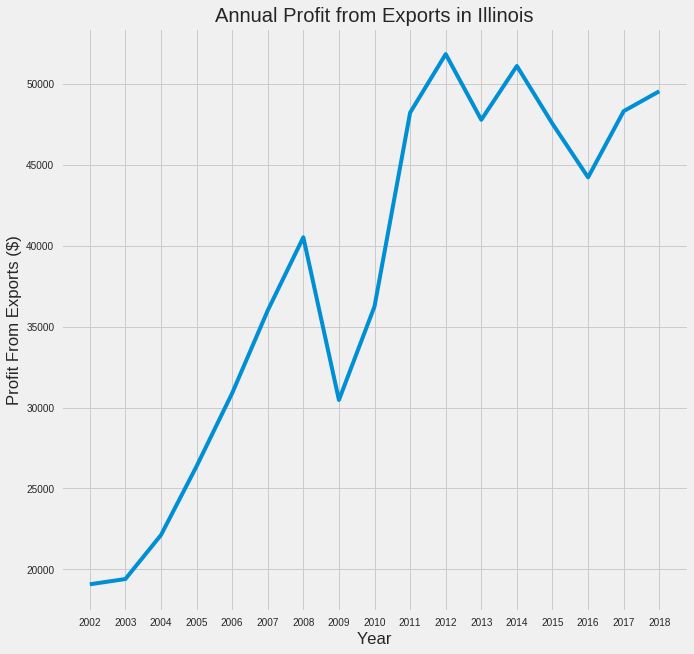

In [44]:
# Make exploratory plot for each state 
plt.figure(figsize=(10,10))
plt.plot(ill)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Illinois')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
# Make arizona data frame remove commas from values 
ariz = pd.DataFrame(full.loc[2]).replace(',', '',regex=True)

In [0]:
#drop state header 
ariz.drop('State',inplace=True)


In [47]:
# change numerical values to float and verify change in dtypes
ariz = ariz.astype(float,inplace=True)
ariz.dtypes


2    float64
dtype: object

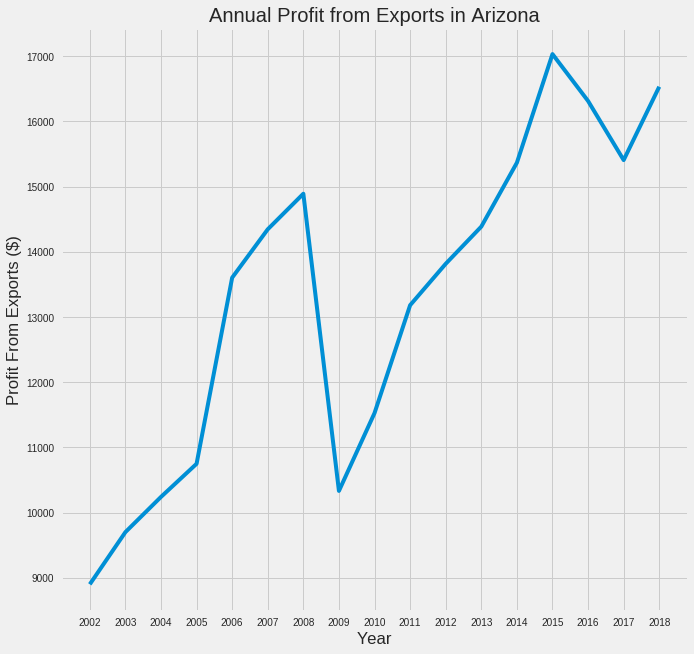

In [48]:
#plot exploratory graph for arizona 
plt.figure(figsize=(10,10))
plt.plot(ariz)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Arizona')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
#make massachusetts data frame and remove commas
mass = pd.DataFrame(full.loc[20]).replace(',','',regex=True)

In [0]:
#drop state header 
mass.drop('State',inplace=True)


In [0]:
# change numerical values to float
mass= mass.astype(float, inlpace= True)

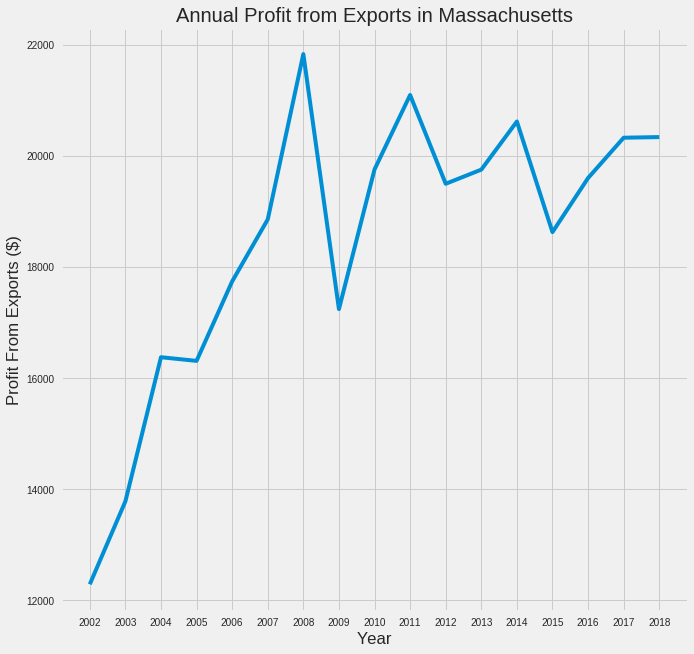

In [52]:
#plot exploratory visualization
plt.figure(figsize=(10,10))
plt.plot(mass)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Massachusetts')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
#make new york Data Frame and drop commas 
newyrk = pd.DataFrame(full.loc[31]).replace(',','',regex=True)

In [54]:
#verify data is loading correctly 
newyrk.head()

,31
State,New York
2002,27676.40
2003,28657.40
2004,32326.20
2005,37412.10


In [0]:
#drop state header 
newyrk.drop('State', inplace = True )

In [0]:
#change numerical values to float 
newyrk = newyrk.astype(float,inplace=True)

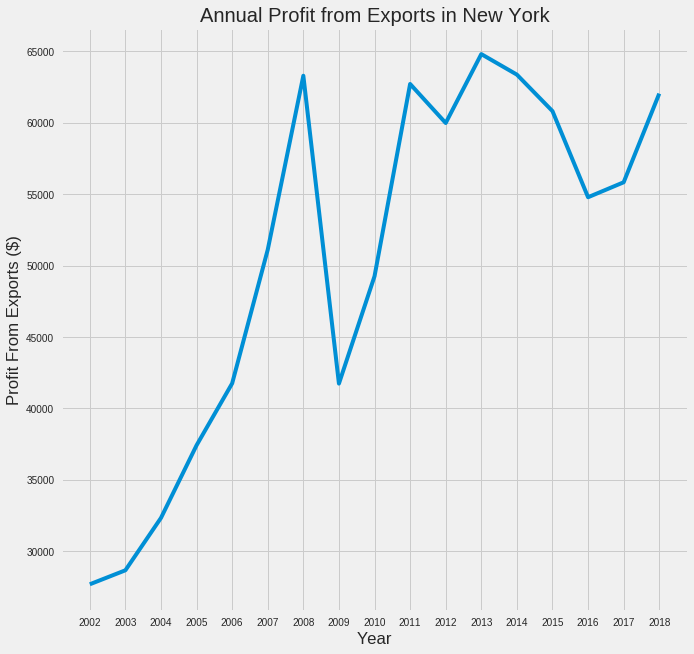

In [57]:
#plot exploratory visualization
plt.figure(figsize=(10,10))
plt.plot(newyrk)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in New York')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
#make texas Data Frame and remove commas 
tex = pd.DataFrame(full.loc[42]).replace(',','',regex=True)

In [0]:
#drop state header 
tex.drop('State', inplace = True )

In [0]:
#change numerical values to float 
tex= tex.astype(float,inplace= True)

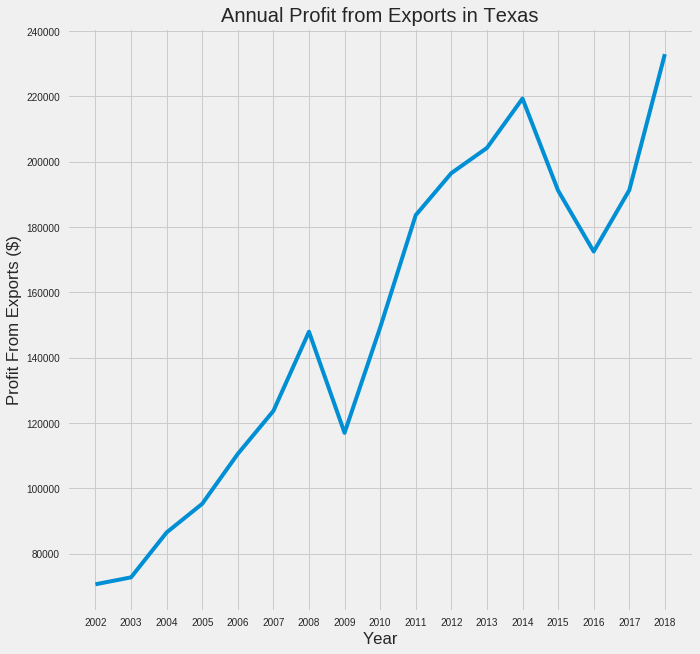

In [61]:
#plot exploratory visualization
plt.figure(figsize=(10,10))
plt.plot(tex)
plt.ylabel('Profit From Exports ($)')
plt.xlabel('Year')
plt.title('Annual Profit from Exports in Texas')
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
# make Data Frame for all states in focus, using data frames created above. 
canstates= pd.concat([ill,ariz,mass,newyrk,tex],axis=1)
canstates.head()
# Name columns with state names for easier indexing 
column_key= {12:'Illinois',2:'Arizona',20:'Massachusetts',31:'New York',42:'Texas'}
canstates.rename(columns= column_key, inplace= True)

In [63]:
# verify data types are float inorder to plot correctly 
canstates.dtypes

Illinois         float64
Arizona          float64
Massachusetts    float64
New York         float64
Texas            float64
dtype: object

Data from 16 years including 4 election cycles should be sufficient to tell a story .
Start from 2004 election. Bush texas and john kerry Mass
#An overview of the states in focus for this article

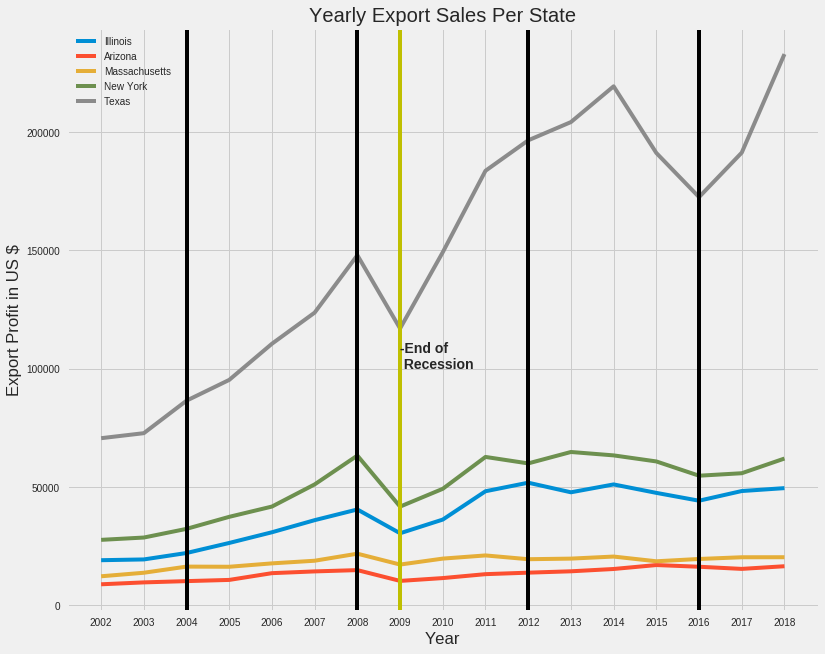

In [64]:
#Plot overview of states with vertical lines indicating election years
#input line for recession end 
plt.figure(figsize=(12,10))
plt.plot(canstates);
plt.title('Yearly Export Sales Per State')
plt.ylabel('Export Profit in US $')
plt.xlabel('Year')
plt.axvline(2009,color='y',label='recession_end')
plt.axvline(2004,color='k')
plt.axvline(2008,color='k')
plt.axvline(2012,color='k')
plt.axvline(2016,color='k')
plt.legend(canstates);
plt.text(x=2009,y=100000,s=('-End of ''\n'' Recession'),fontweight= 'bold');



In [65]:
#Make a seperate Df for the states in focus 
texmass = pd.concat([tex,mass],axis=1)
texmass.rename(columns= column_key, inplace= True)
texmass.head(10)

,Texas,Massachusetts
2002,70641.6,12284.7
2003,72761.5,13778.6
2004,86502.0,16373.3
2005,95283.1,16307.4
2006,110555.9,17738.5
2007,123708.1,18855.3
2008,147962.1,21831.2
2009,117004.3,17239.6
2010,149243.3,19754.6
2011,183658.3,21094.9


Presidential candidates 2004 - Home State

John Kerry - Massachusetts

George W Bush - Texas *

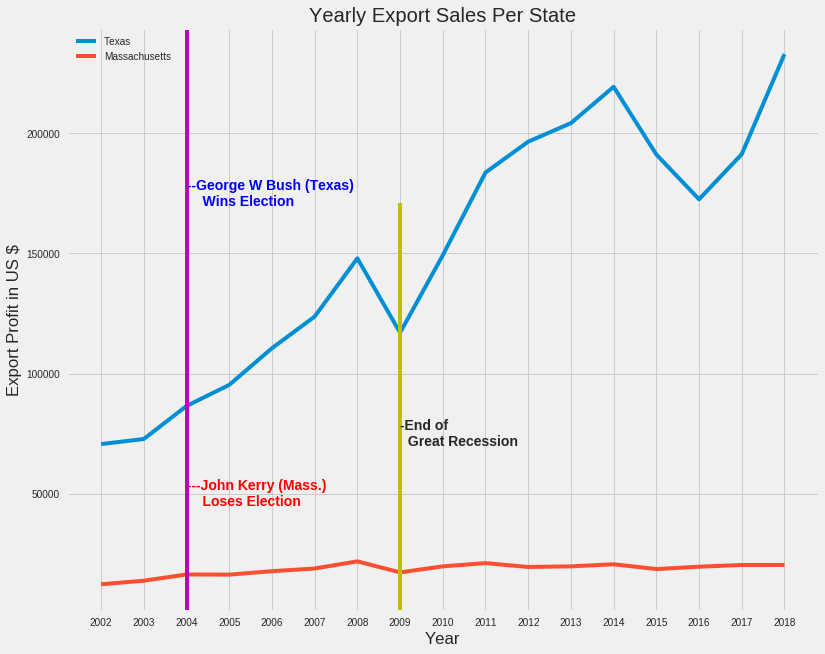

In [91]:
plt.figure(figsize=(12,10))
plt.plot(texmass)
plt.title('Yearly Export Sales Per State')
plt.ylabel('Export Profit in US $')
plt.xlabel('Year')
plt.axvline(2009,color='y',label='recession_end',ymax=0.7)
plt.axvline(x= 2004, color='m')
plt.legend([('Texas'),('Massachusetts')])
plt.text(x=2004, y= 170000,s=('--George W Bush (Texas) ''\n''    Wins Election'),
         color= 'b',fontweight= 'bold')
plt.text(x=2004,y=45000,s=('---John Kerry (Mass.)''\n''    Loses Election '),
         color= 'r',fontweight='bold')
plt.text(x=2009,y=70000,s=('-End of ''\n''  Great Recession'),fontweight= 'bold');


**Within one year of winning the election, George Bush's home state of Texas appears to increase sales of export goods by a larger margin than that of defeated John Kerry's home state of Massachusetts. While growth of total export sales did increase in Massachusetts it happens at less of a rate than Texas after George W Bush wins presidency. Lets explore if this holds true with further election cycles.** 

Presidential Candidates 2008 - Home State

Barack Obama - Illinois *

John McCain - Arizona

In [0]:
# Make DF for states in focus 
arill = pd.concat([ill,ariz],axis=1)
arill.rename(columns= column_key,inplace=True)


In [68]:
arill.head()

,Illinois,Arizona
2002,19078.2,8899.0
2003,19403.4,9699.0
2004,22121.8,10239.2
2005,26370.7,10747.4
2006,30887.1,13602.7


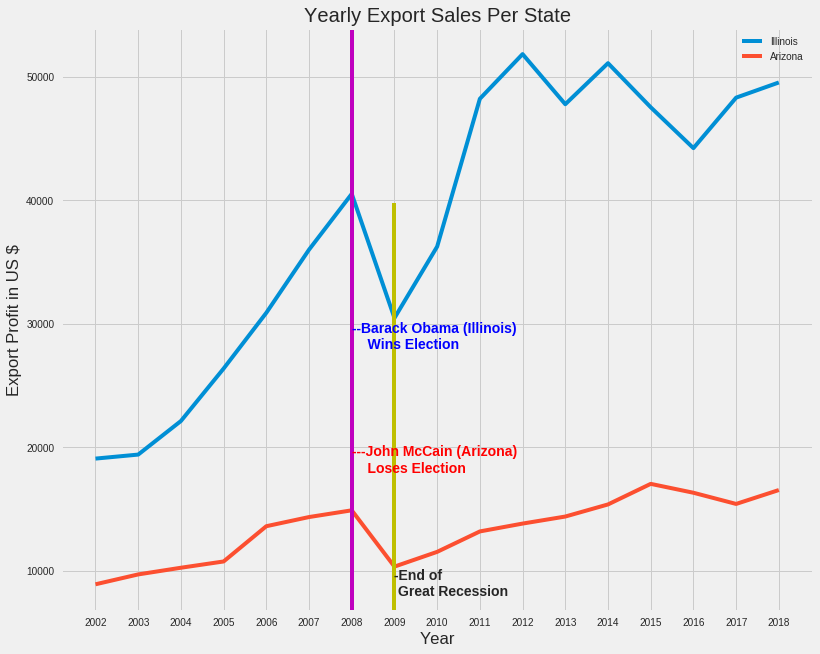

In [81]:
plt.figure(figsize=(12,10))
plt.plot(arill)
plt.title('Yearly Export Sales Per State')
plt.ylabel('Export Profit in US $')
plt.xlabel('Year')
plt.axvline(2009,color='y',label='recession_end',ymax=0.7)
plt.axvline(x= 2008, color='m')
plt.legend([('Illinois'),('Arizona')])
plt.text(x=2008, y= 28000,s=('--Barack Obama (Illinois) ''\n''    Wins Election'),
         color= 'b',fontweight= 'bold')
plt.text(x=2008,y=18000,s=('---John McCain (Arizona) ''\n''    Loses Election '),
         color= 'r',fontweight='bold') 
plt.text(x=2009,y=8000,s=('-End of ''\n'' Great Recession'),fontweight= 'bold');


**With the 2008 election cycle the data is less conclusive. Due to the effects of the recession lingering (2007 -2009) its hard to see the effect on the state level. In looking at the overall chart for the states it obvious that all states took a hit in export sales during the recession and this chart shows nothing different. But one thing that catches my eye is the speed of recovery afterward. With regards to Illinois( President obama's home state) the export sales rate takes around 1.5 years to match pre-recession levels and then surpasses those levels within obama's first term. Where Arizona( John McCain's home state) takes 4 years to acheive pre-recession totals for export sales.** Continue with 2012 election

Presidential candidates 2012 - Home State

Barack Obama - Illinois *

Mitt Romney - Massachusetts

In [0]:
illmass = pd.concat([ill,mass],axis=1)
illmass.rename(columns=column_key,inplace=True)

In [71]:
illmass.head()

,Illinois,Massachusetts
2002,19078.2,12284.7
2003,19403.4,13778.6
2004,22121.8,16373.3
2005,26370.7,16307.4
2006,30887.1,17738.5


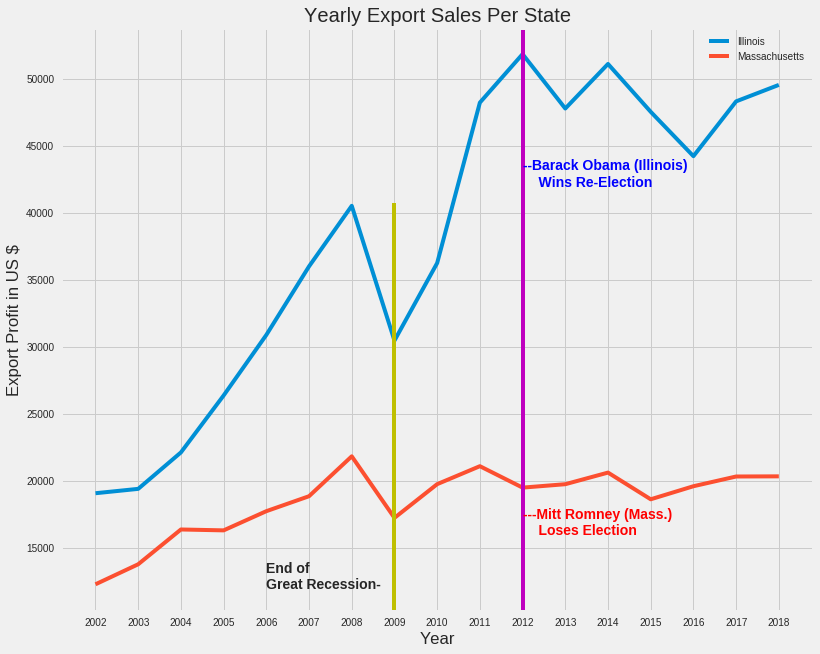

In [87]:
plt.figure(figsize=(12,10))
plt.plot(illmass)
plt.title('Yearly Export Sales Per State')
plt.ylabel('Export Profit in US $')
plt.xlabel('Year')
plt.axvline(2009,color='y',label='recession_end',ymax=0.7)
plt.axvline(x= 2012, color='m')
plt.legend([('Illinois'),('Massachusetts')])
plt.text(x=2012, y= 42000,s=('--Barack Obama (Illinois) ''\n''    Wins Re-Election'),
         color= 'b',fontweight= 'bold')
plt.text(x=2012,y=16000,s=('---Mitt Romney (Mass.) ''\n''    Loses Election '),
         color= 'r',fontweight='bold')
plt.text(x=2006,y=12000,s=('End of ''\n'  
                           'Great Recession-'),fontweight= 'bold');


**The 2012 election is an exception to the findings so far. With the re-election of Obama there is a sharp decline in the export sales for Illinois. Though the recovery is quite rapid it makes me consider that the effect of the election is slower than previously thought. Perhaps the public being unsure of the outcome before the election introduces volitility that effects the market. Or the re-election its-self kept exporters from increasing or continuing. But I will save that point for another article. **

**Massachusetts in this election cycle seems to be positively impacted for two years after Mitt Romney lost the election but in 2014-2015 the export sales take a sharp downturn. With the delay of this decline after the election it appears to be attributed to a slow reacting market or possibly related to something other than the outcome of the election.   **


Presidential candidates 2016 - Home State

Hillary Clinton - New York

Donald Trump - New York *

In the case of the 2016 election both majority candidates are from New York. So this graph will only focus on one state 


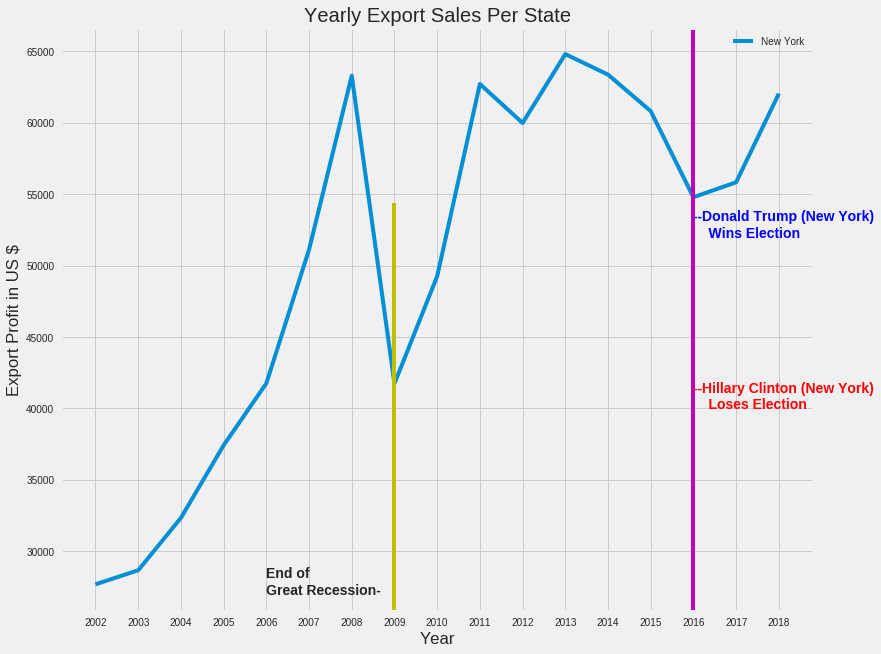

In [90]:
plt.figure(figsize=(12,10))
plt.plot(newyrk)
plt.title('Yearly Export Sales Per State')
plt.ylabel('Export Profit in US $')
plt.xlabel('Year')
plt.axvline(2009,color='y',label='recession_end',ymax=0.7)
plt.axvline(x= 2016, color='m')
plt.legend([('New York')])
plt.text(x=2016, y= 52000,s=('--Donald Trump (New York)''\n''    Wins Election'),
         color= 'b',fontweight= 'bold')
plt.text(x=2016,y=40000,s=('--Hillary Clinton (New York)''\n''    Loses Election '),
         color= 'r',fontweight='bold')
plt.text(x=2006,y=27000,s=('End of ''\n''Great Recession-'),fontweight= 'bold');
